In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.preprocessing import StandardScaler

In [138]:
from sklearn.metrics import r2_score

In [9]:
df=pd.read_csv("nyc-rolling-sales.csv")


In [10]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [12]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BOROUGH'>

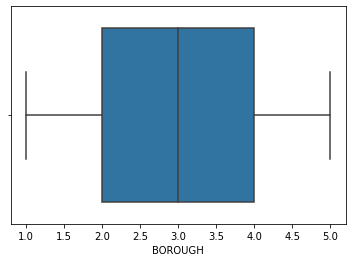

In [14]:
sns.boxplot(df['BOROUGH'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BLOCK'>

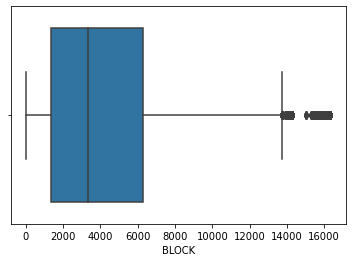

In [15]:
sns.boxplot(df['BLOCK'])

In [16]:
q1=df['BLOCK'].quantile(0.25)

In [17]:
q3=df['BLOCK'].quantile(0.75)

In [18]:
IQR=q3-q1

In [19]:
lower=q1-1.5*IQR

In [20]:
upper=q3+1.5*IQR

In [21]:
df=df[(df['BLOCK']>lower) & (df['BLOCK']<upper)]

In [22]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOT'>

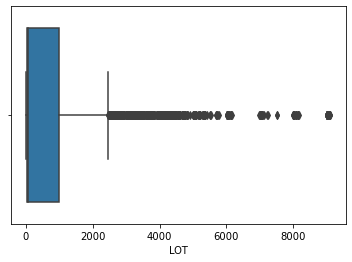

In [23]:
sns.boxplot(df['LOT'])

In [24]:
q1=df['LOT'].quantile(0.25)

In [25]:
q3=df['LOT'].quantile(0.75)

In [26]:
IQR=q3-q1

In [27]:
lower=q1-1.5*IQR

In [28]:
upper=q3+1.5*IQR

In [29]:
df=df[(df['LOT']>lower) & (df['LOT']<upper)]

In [30]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZIP CODE'>

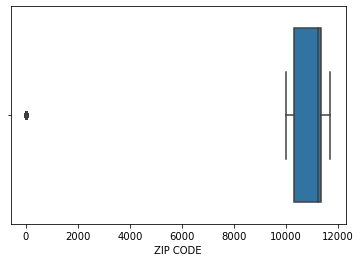

In [31]:
sns.boxplot(df['ZIP CODE'])

In [32]:
q1=df['ZIP CODE'].quantile(0.25)

In [33]:
q3=df['ZIP CODE'].quantile(0.75)

In [34]:
IQR=q3-q1

In [35]:
lower=q1-1.5*IQR

In [36]:
upper=q3+1.5*IQR

In [37]:
df=df[(df['ZIP CODE']>lower) & (df['ZIP CODE']<upper)]

In [38]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RESIDENTIAL UNITS'>

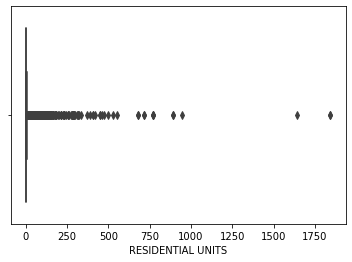

In [39]:
sns.boxplot(df['RESIDENTIAL UNITS'])

In [40]:
q1=df['RESIDENTIAL UNITS'].quantile(0.25)

In [41]:
q3=df['RESIDENTIAL UNITS'].quantile(0.75)

In [42]:
IQR=q3-q1

In [43]:
lower=q1-1.5*IQR

In [44]:
upper=q3+1.5*IQR

In [45]:
df=df[(df['RESIDENTIAL UNITS']>lower) & (df['RESIDENTIAL UNITS']<upper)]

In [46]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,499000,2017-03-10 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",...,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,0,0,0,-,-,1920,2,C6,529500,2017-06-09 00:00:00
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,0,0,0,-,-,1920,2,C6,423000,2017-07-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='COMMERCIAL UNITS'>

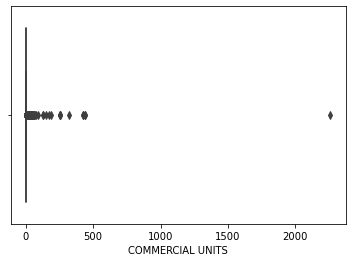

In [47]:
sns.boxplot(df['COMMERCIAL UNITS'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTAL UNITS'>

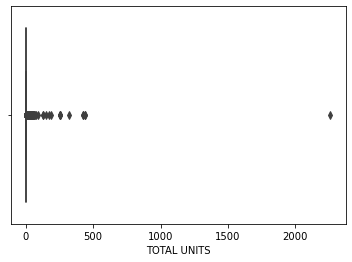

In [48]:
sns.boxplot(df['TOTAL UNITS'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEAR BUILT'>

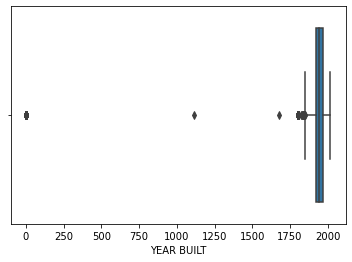

In [49]:
sns.boxplot(df['YEAR BUILT'])

In [50]:
q1=df['YEAR BUILT'].quantile(0.25)

In [51]:
q3=df['YEAR BUILT'].quantile(0.75)

In [52]:
IQR=q3-q1

In [53]:
lower=q1-1.5*IQR

In [54]:
upper=q3+1.5*IQR

In [55]:
df=df[(df['YEAR BUILT']>lower) & (df['YEAR BUILT']<upper)]

In [56]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,499000,2017-03-10 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",...,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,0,0,0,-,-,1920,2,C6,529500,2017-06-09 00:00:00
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,0,0,0,-,-,1920,2,C6,423000,2017-07-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE'>

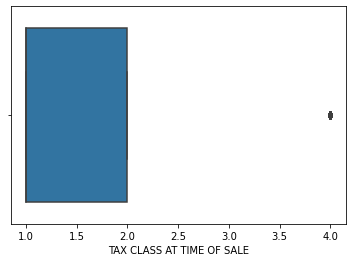

In [57]:
sns.boxplot(df['TAX CLASS AT TIME OF SALE'])

In [58]:
q1=df['TAX CLASS AT TIME OF SALE'].quantile(0.25)

In [59]:
q3=df['TAX CLASS AT TIME OF SALE'].quantile(0.75)

In [60]:
IQR=q3-q1

In [61]:
lower=q1-1.5*IQR

In [62]:
upper=q3+1.5*IQR

In [63]:
df=df[(df['TAX CLASS AT TIME OF SALE']>lower) & (df['TAX CLASS AT TIME OF SALE']<upper)]

In [64]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,499000,2017-03-10 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",...,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,0,0,0,-,-,1920,2,C6,529500,2017-06-09 00:00:00
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,0,0,0,-,-,1920,2,C6,423000,2017-07-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,0,2,3020,1800,1997,1,B9,-,2016-12-01 00:00:00
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00


In [65]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,499000,2017-03-10 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",...,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,0,0,0,-,-,1920,2,C6,529500,2017-06-09 00:00:00
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,0,0,0,-,-,1920,2,C6,423000,2017-07-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,0,2,3020,1800,1997,1,B9,-,2016-12-01 00:00:00
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00


In [66]:
def ConvertToInt(ele):
    ele=str(ele)
    
    if ele.isdigit():
        return int(ele)
    else:
        return 0

In [67]:
df['SALE PRICE']=df['SALE PRICE'].apply(ConvertToInt)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24772\3316640529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE PRICE']=df['SALE PRICE'].apply(ConvertToInt)


In [68]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,1,2016-09-06 00:00:00
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,499000,2017-03-10 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",...,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,0,0,0,-,-,1920,2,C6,529500,2017-06-09 00:00:00
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,0,0,0,-,-,1920,2,C6,423000,2017-07-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,0,2,3020,1800,1997,1,B9,0,2016-12-01 00:00:00
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00


In [69]:
df['SALE DATE']=pd.to_datetime(df['SALE DATE'])




C:\Users\himanshu\AppData\Local\Temp\ipykernel_24772\4214552270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE DATE']=pd.to_datetime(df['SALE DATE'])


In [70]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,1,2016-09-06
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,499000,2017-03-10
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",...,0,0,0,-,-,1920,2,C6,10,2017-04-28
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,0,0,0,-,-,1920,2,C6,529500,2017-06-09
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,0,0,0,-,-,1920,2,C6,423000,2017-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,0,2,3020,1800,1997,1,B9,0,2016-12-01
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21


In [71]:
df['Sale Month']=df['SALE DATE'].dt.month

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24772\2263763028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale Month']=df['SALE DATE'].dt.month


In [72]:
df['Sale Year']=df['SALE DATE'].dt.year

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24772\175792757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale Year']=df['SALE DATE'].dt.year


In [73]:
df['Sale Day']=df['SALE DATE'].dt.day

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24772\2252560658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale Day']=df['SALE DATE'].dt.day


In [74]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Sale Month,Sale Year,Sale Day
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,-,-,1920,2,C6,1,2016-09-06,9,2016,6
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,-,-,1920,2,C6,499000,2017-03-10,3,2017,10
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",...,-,-,1920,2,C6,10,2017-04-28,4,2017,28
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,-,-,1920,2,C6,529500,2017-06-09,6,2017,9
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,-,-,1920,2,C6,423000,2017-07-14,7,2017,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,11088,2160,1994,1,B2,648000,2016-12-07,12,2016,7
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,3020,1800,1997,1,B9,0,2016-12-01,12,2016,1
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2400,2575,1998,1,B9,450000,2016-11-28,11,2016,28
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2498,2377,1998,1,B9,550000,2017-04-21,4,2017,21


In [75]:
df=df.drop("SALE DATE",axis=1)


In [76]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,Sale Month,Sale Year,Sale Day
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,-,-,1920,2,C6,1,9,2016,6
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,-,-,1920,2,C6,499000,3,2017,10
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",...,0,-,-,1920,2,C6,10,4,2017,28
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,0,-,-,1920,2,C6,529500,6,2017,9
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,0,-,-,1920,2,C6,423000,7,2017,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,2,11088,2160,1994,1,B2,648000,12,2016,7
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,3020,1800,1997,1,B9,0,12,2016,1
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,2400,2575,1998,1,B9,450000,11,2016,28
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,2498,2377,1998,1,B9,550000,4,2017,21


In [77]:
df=df.drop('Unnamed: 0',axis=1)


In [78]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,Sale Month,Sale Year,Sale Day
12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,-,-,1920,2,C6,1,9,2016,6
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,-,-,1920,2,C6,499000,3,2017,10
14,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,...,0,-,-,1920,2,C6,10,4,2017,28
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",,...,0,-,-,1920,2,C6,529500,6,2017,9
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",,...,0,-,-,1920,2,C6,423000,7,2017,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,,...,2,11088,2160,1994,1,B2,648000,12,2016,7
84542,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,,...,2,3020,1800,1997,1,B9,0,12,2016,1
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400,2575,1998,1,B9,450000,11,2016,28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498,2377,1998,1,B9,550000,4,2017,21


In [79]:
df=df.reset_index(drop=True)

In [80]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,Sale Month,Sale Year,Sale Day
0,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,-,-,1920,2,C6,1,9,2016,6
1,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,-,-,1920,2,C6,499000,3,2017,10
2,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,...,0,-,-,1920,2,C6,10,4,2017,28
3,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",,...,0,-,-,1920,2,C6,529500,6,2017,9
4,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",,...,0,-,-,1920,2,C6,423000,7,2017,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68146,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,,...,2,11088,2160,1994,1,B2,648000,12,2016,7
68147,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,,...,2,3020,1800,1997,1,B9,0,12,2016,1
68148,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400,2575,1998,1,B9,450000,11,2016,28
68149,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498,2377,1998,1,B9,550000,4,2017,21


In [81]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'Sale Month', 'Sale Year', 'Sale Day'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


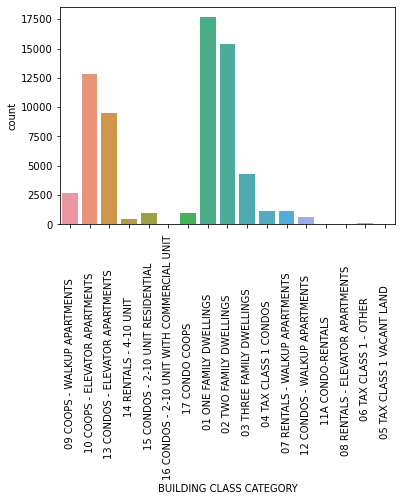

In [82]:
sns.countplot(df['BUILDING CLASS CATEGORY'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


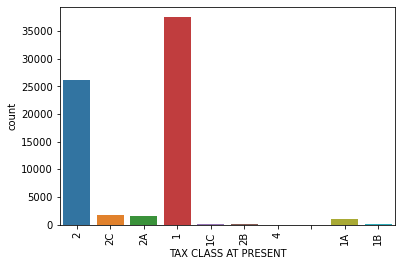

In [83]:
sns.countplot(df['TAX CLASS AT PRESENT'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


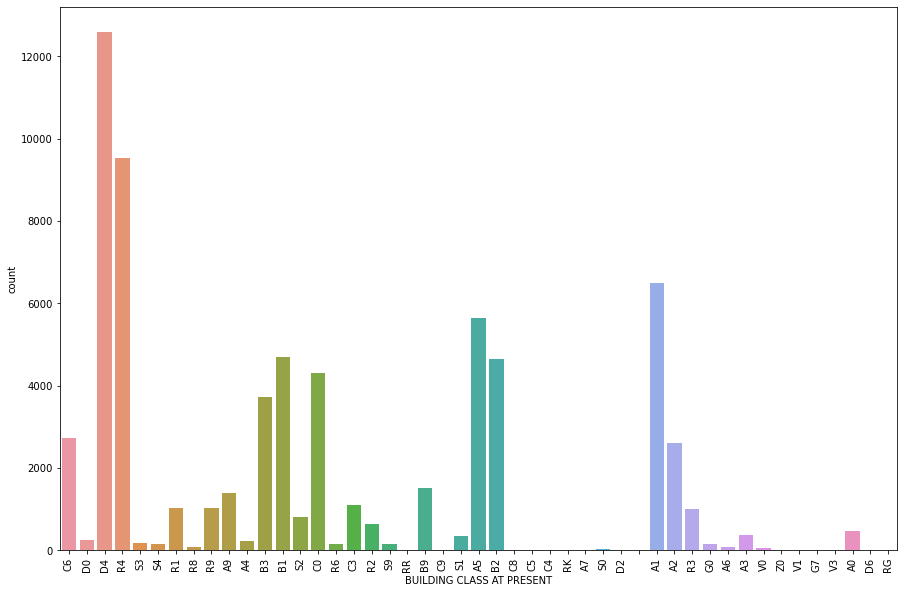

In [84]:
plt.figure(figsize=(15,10))
sns.countplot(df['BUILDING CLASS AT PRESENT'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


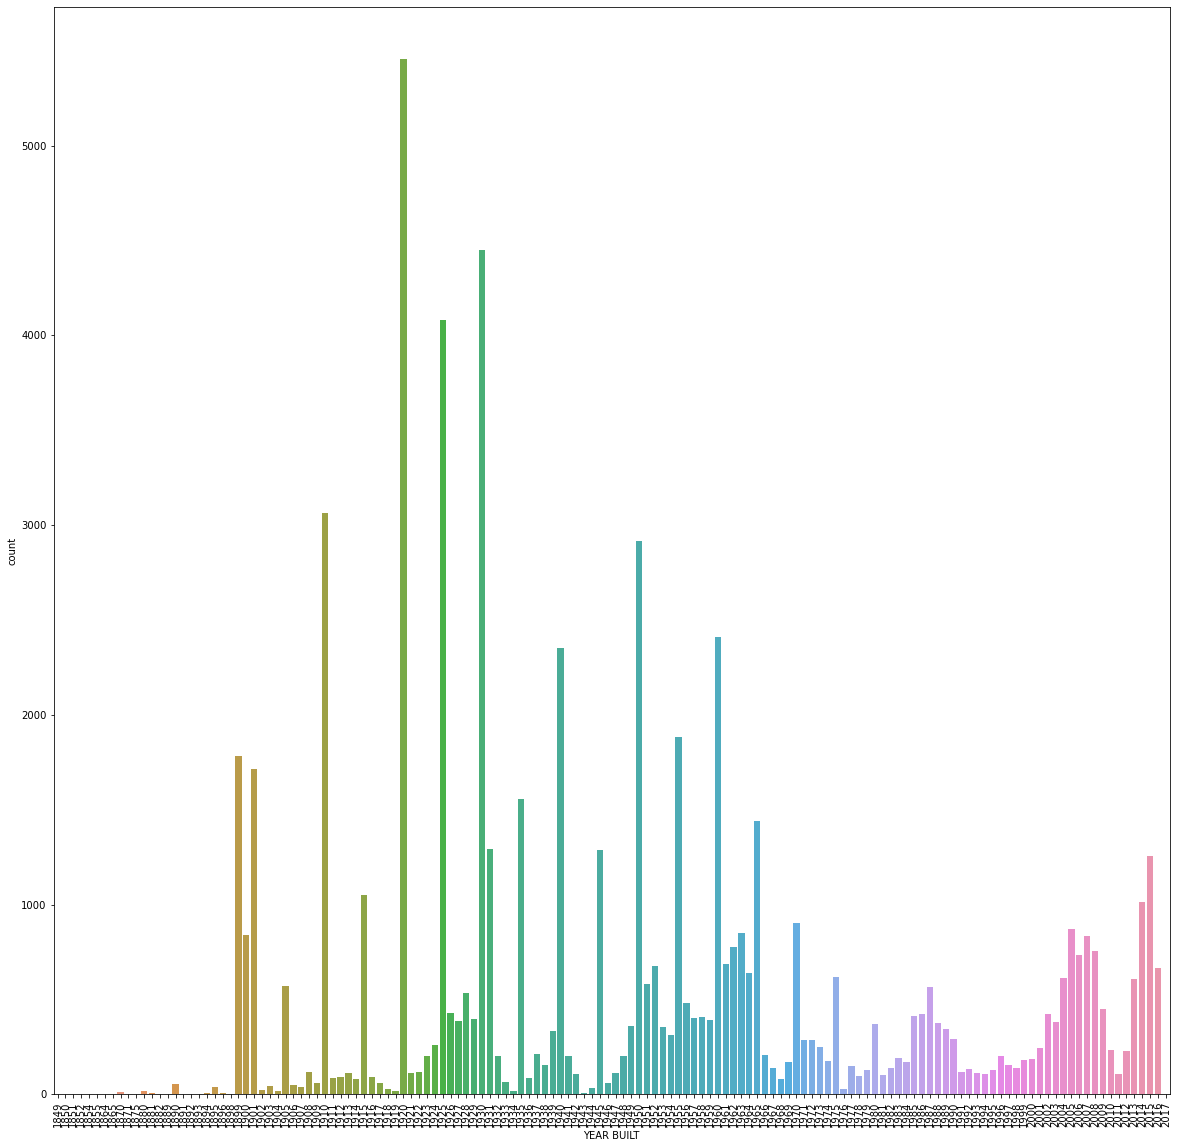

In [85]:
plt.figure(figsize=(20,20))
sns.countplot(df['YEAR BUILT'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


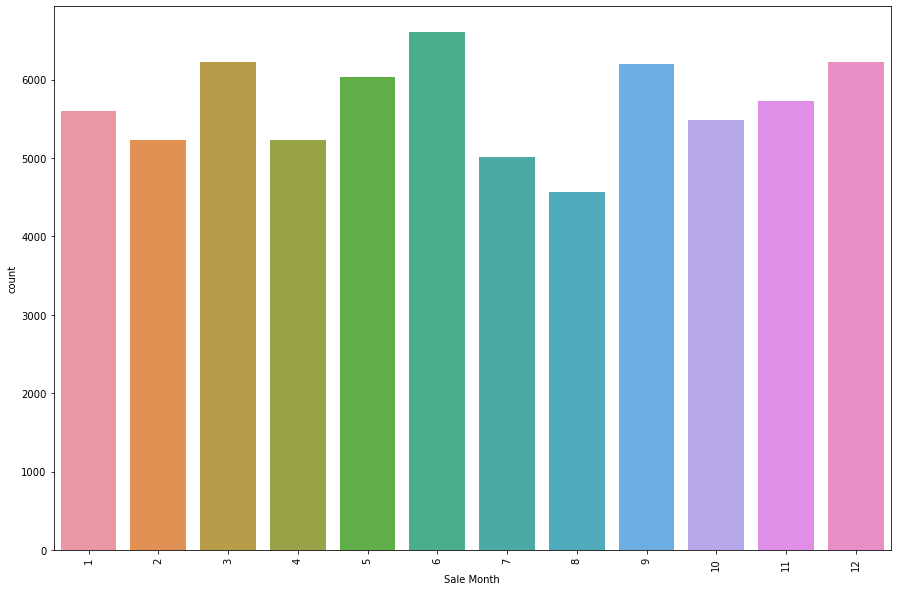

In [86]:
plt.figure(figsize=(15,10))
sns.countplot(df['Sale Month'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


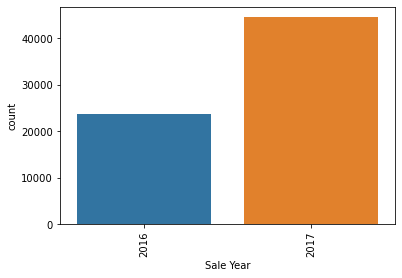

In [87]:
sns.countplot(df['Sale Year'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


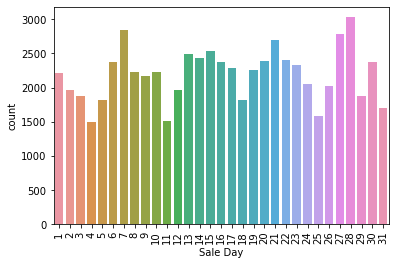

In [88]:
sns.countplot(df['Sale Day'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


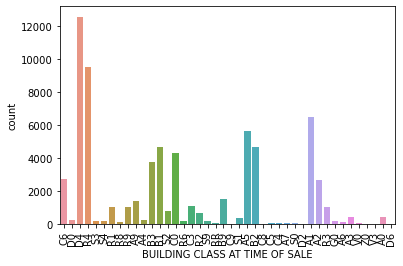

In [89]:
sns.countplot(df['BUILDING CLASS AT TIME OF SALE'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


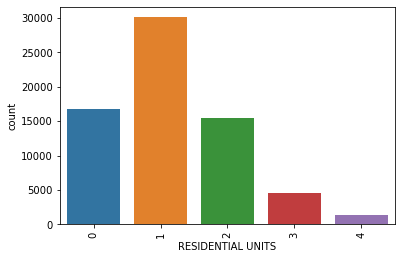

In [90]:
sns.countplot(df['RESIDENTIAL UNITS'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


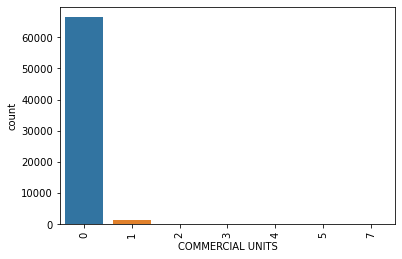

In [91]:
sns.countplot(df['COMMERCIAL UNITS'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


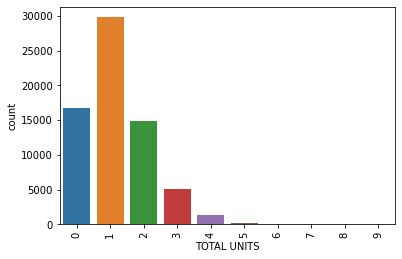

In [92]:
sns.countplot(df['TOTAL UNITS'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


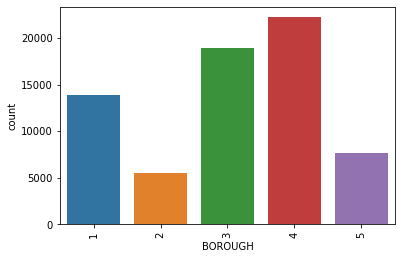

In [93]:
sns.countplot(df['BOROUGH'])
plt.xticks(rotation=90)
plt.show()

In [94]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,Sale Month,Sale Year,Sale Day
0,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,-,-,1920,2,C6,1,9,2016,6
1,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,-,-,1920,2,C6,499000,3,2017,10
2,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,...,0,-,-,1920,2,C6,10,4,2017,28
3,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",,...,0,-,-,1920,2,C6,529500,6,2017,9
4,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",,...,0,-,-,1920,2,C6,423000,7,2017,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68146,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,,...,2,11088,2160,1994,1,B2,648000,12,2016,7
68147,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,,...,2,3020,1800,1997,1,B9,0,12,2016,1
68148,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400,2575,1998,1,B9,450000,11,2016,28
68149,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498,2377,1998,1,B9,550000,4,2017,21


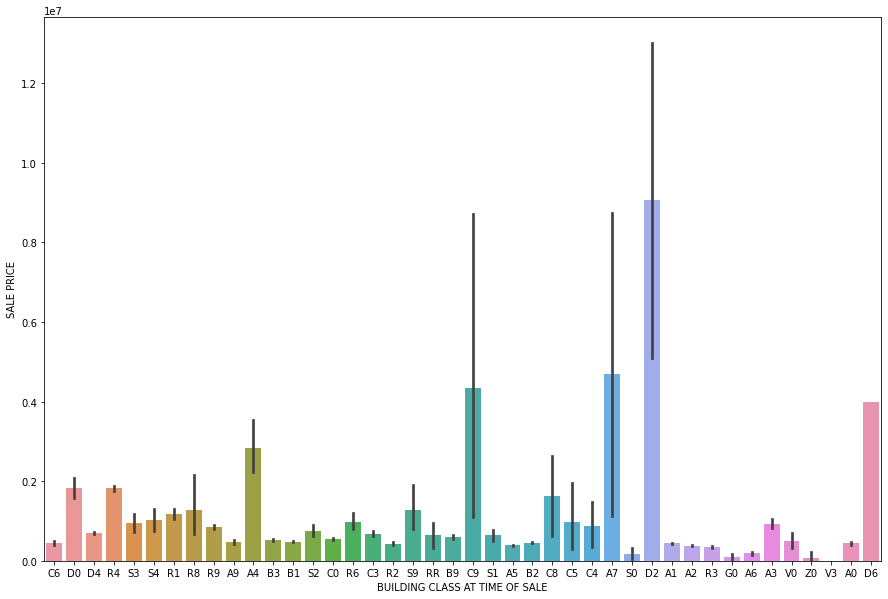

In [95]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['BUILDING CLASS AT TIME OF SALE'],y=df['SALE PRICE'])
plt.show()

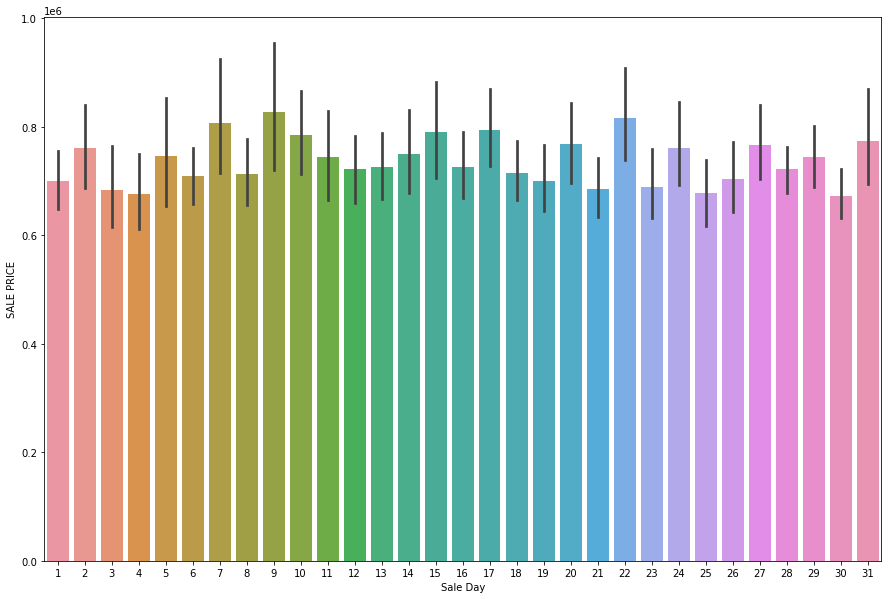

In [96]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Sale Day'],y=df['SALE PRICE'])
plt.show()

<AxesSubplot:xlabel='YEAR BUILT', ylabel='SALE PRICE'>

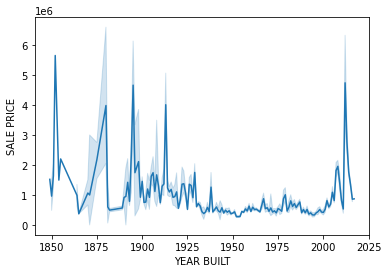

In [97]:
sns.lineplot(x=df['YEAR BUILT'],y=df['SALE PRICE'])

<AxesSubplot:xlabel='Sale Month', ylabel='SALE PRICE'>

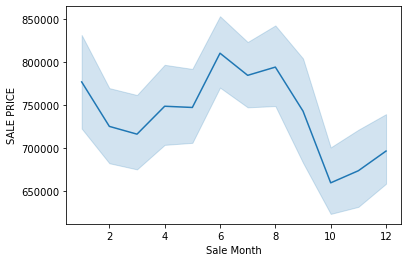

In [98]:
sns.lineplot(x=df['Sale Month'],y=df['SALE PRICE'])

<AxesSubplot:xlabel='Sale Year', ylabel='SALE PRICE'>

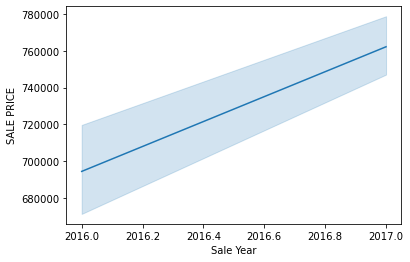

In [99]:
sns.lineplot(x=df['Sale Year'],y=df['SALE PRICE'])

<AxesSubplot:xlabel='Sale Day', ylabel='SALE PRICE'>

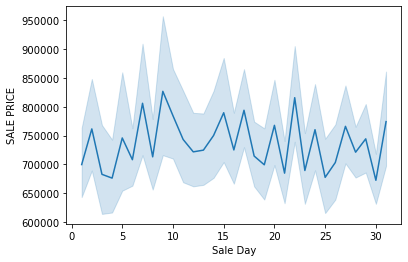

In [100]:
sns.lineplot(x=df['Sale Day'],y=df['SALE PRICE'])

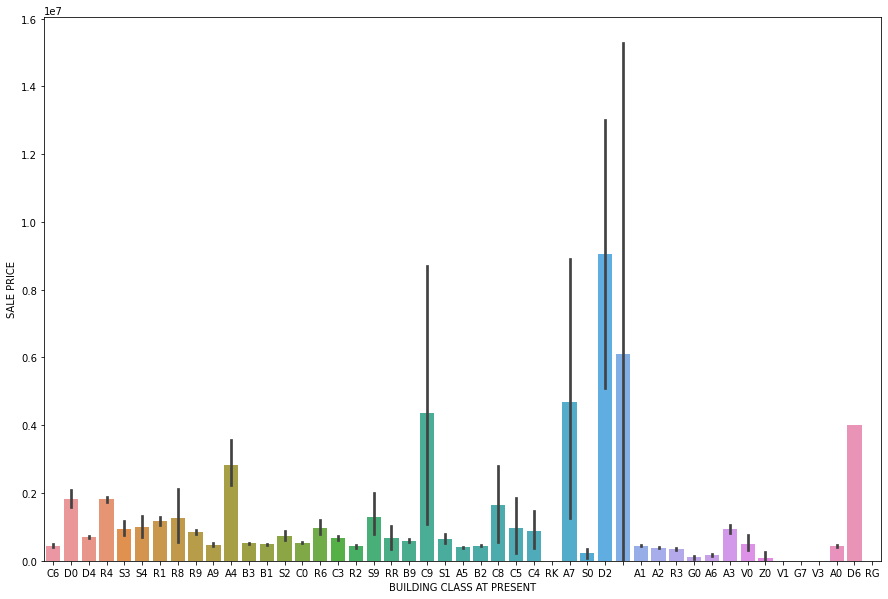

In [101]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['BUILDING CLASS AT PRESENT'],y=df['SALE PRICE'])
plt.show()

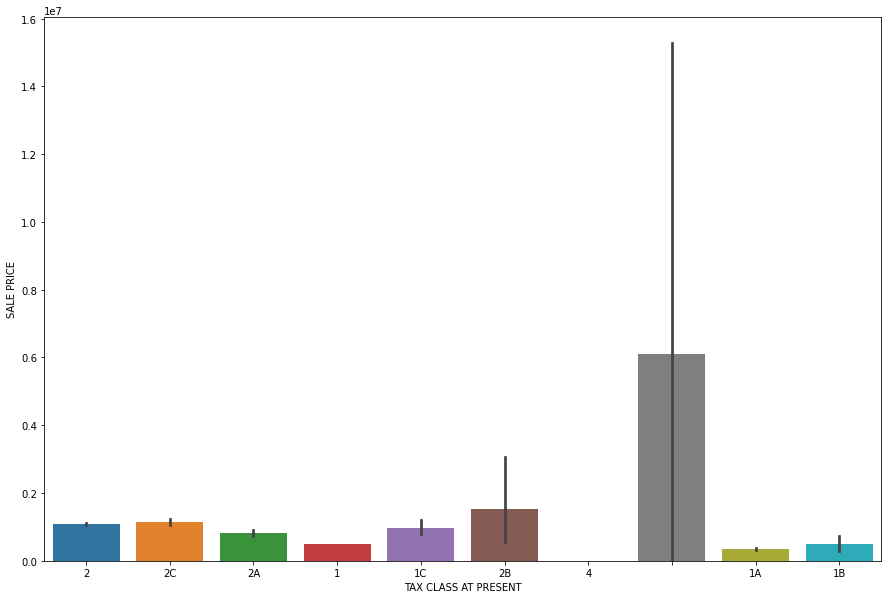

In [102]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['TAX CLASS AT PRESENT'],y=df['SALE PRICE'])
plt.show()

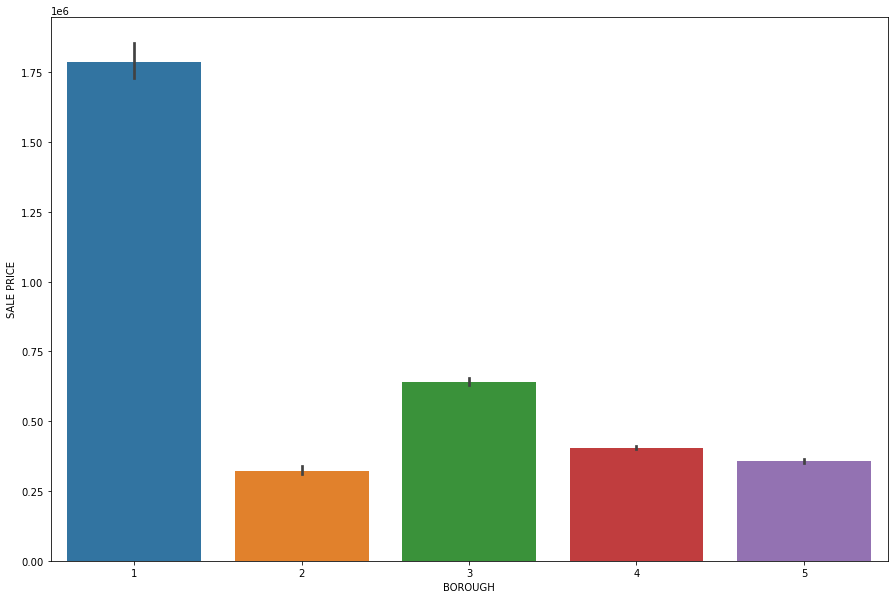

In [103]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['BOROUGH'],y=df['SALE PRICE'])
plt.show()

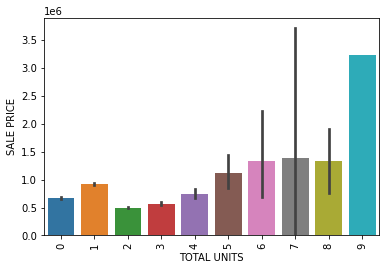

In [104]:
sns.barplot(x=df['TOTAL UNITS'],y=df['SALE PRICE'])
plt.xticks(rotation=90)
plt.show()

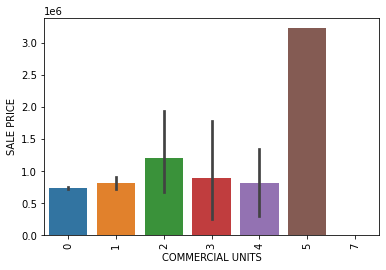

In [105]:
sns.barplot(x=df['COMMERCIAL UNITS'],y=df['SALE PRICE'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


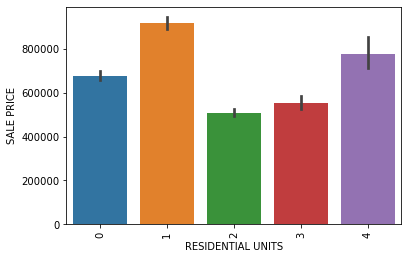

In [106]:
sns.barplot(df['RESIDENTIAL UNITS'],y=df['SALE PRICE'])
plt.xticks(rotation=90)
plt.show()

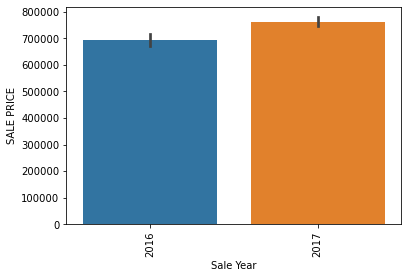

In [107]:
sns.barplot(x=df['Sale Year'],y=df['SALE PRICE'])
plt.xticks(rotation=90)
plt.show()

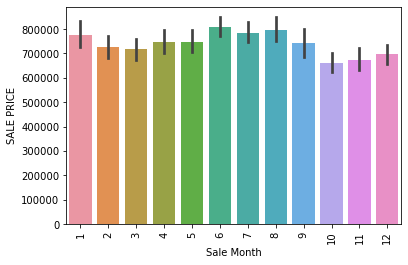

In [108]:
sns.barplot(x=df['Sale Month'],y=df['SALE PRICE'])
plt.xticks(rotation=90)
plt.show()

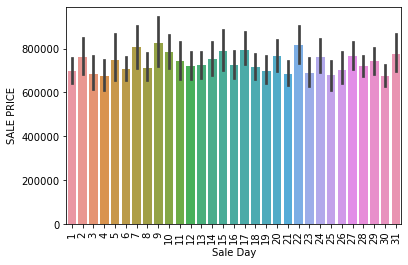

In [109]:
sns.barplot(x=df['Sale Day'],y=df['SALE PRICE'])
plt.xticks(rotation=90)
plt.show()

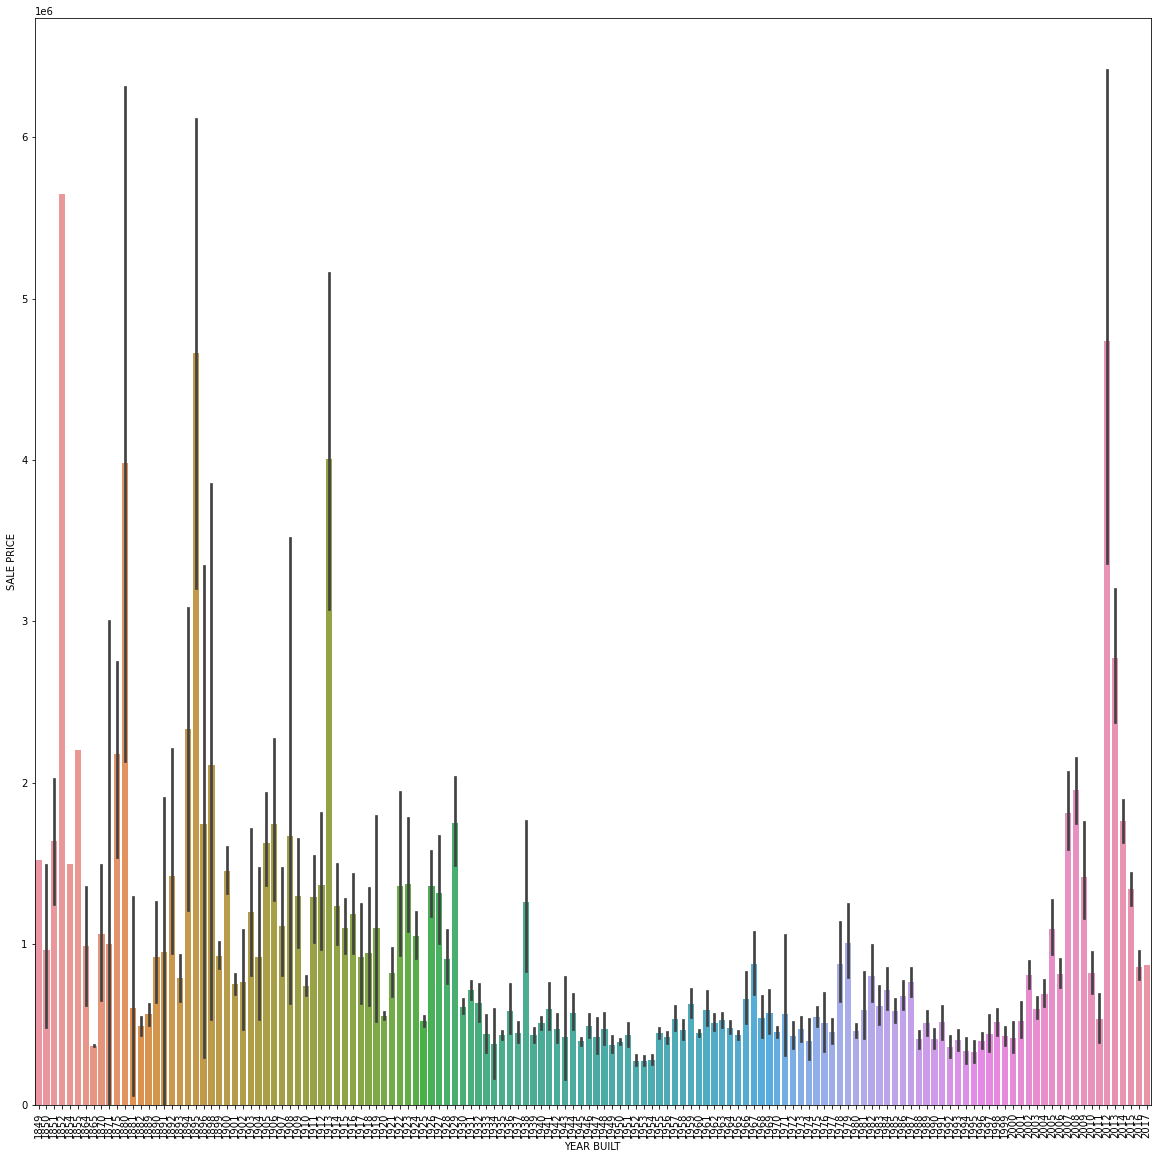

In [110]:
plt.figure(figsize=(20,20))
sns.barplot(x=df['YEAR BUILT'],y=df['SALE PRICE'])
plt.xticks(rotation=90)
plt.show()

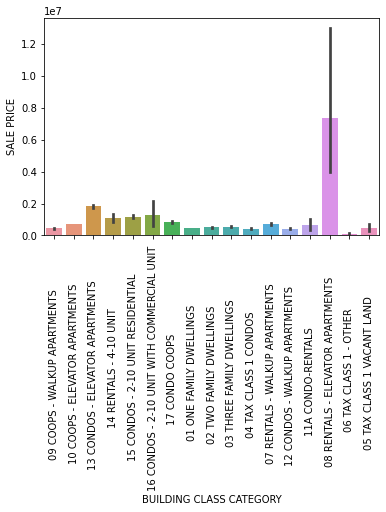

In [111]:
sns.barplot(x=df['BUILDING CLASS CATEGORY'],y=df['SALE PRICE'])
plt.xticks(rotation=90)
plt.show()

In [112]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'Sale Month', 'Sale Year', 'Sale Day'],
      dtype='object')

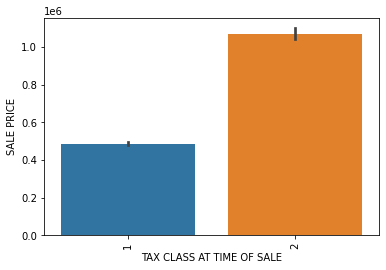

In [113]:
sns.barplot(x=df['TAX CLASS AT TIME OF SALE'],y=df['SALE PRICE'])
plt.xticks(rotation=90)
plt.show()

In [114]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,Sale Month,Sale Year,Sale Day
0,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,-,-,1920,2,C6,1,9,2016,6
1,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,-,-,1920,2,C6,499000,3,2017,10
2,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,...,0,-,-,1920,2,C6,10,4,2017,28
3,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",,...,0,-,-,1920,2,C6,529500,6,2017,9
4,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",,...,0,-,-,1920,2,C6,423000,7,2017,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68146,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,,...,2,11088,2160,1994,1,B2,648000,12,2016,7
68147,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,,...,2,3020,1800,1997,1,B9,0,12,2016,1
68148,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400,2575,1998,1,B9,450000,11,2016,28
68149,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498,2377,1998,1,B9,550000,4,2017,21


In [115]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].apply(ConvertToInt)

In [116]:
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].apply(ConvertToInt)

In [117]:
df['APARTMENT NUMBER']=df['APARTMENT NUMBER'].apply(ConvertToInt)

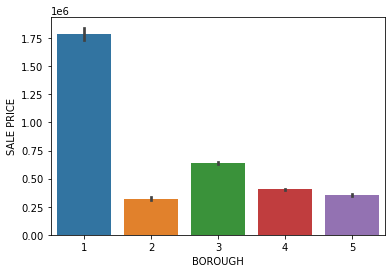

In [118]:
sns.barplot(x=df['BOROUGH'],y=df['SALE PRICE'])
plt.show()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68151 entries, 0 to 68150
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         68151 non-null  int64 
 1   NEIGHBORHOOD                    68151 non-null  object
 2   BUILDING CLASS CATEGORY         68151 non-null  object
 3   TAX CLASS AT PRESENT            68151 non-null  object
 4   BLOCK                           68151 non-null  int64 
 5   LOT                             68151 non-null  int64 
 6   EASE-MENT                       68151 non-null  object
 7   BUILDING CLASS AT PRESENT       68151 non-null  object
 8   ADDRESS                         68151 non-null  object
 9   APARTMENT NUMBER                68151 non-null  int64 
 10  ZIP CODE                        68151 non-null  int64 
 11  RESIDENTIAL UNITS               68151 non-null  int64 
 12  COMMERCIAL UNITS                68151 non-null

In [120]:
le=LabelEncoder()

In [121]:
df['NEIGHBORHOOD']=le.fit_transform(df['NEIGHBORHOOD'])


In [122]:
df['BUILDING CLASS CATEGORY']=le.fit_transform(df['BUILDING CLASS CATEGORY'])

In [123]:
df['TAX CLASS AT PRESENT']=le.fit_transform(df['TAX CLASS AT PRESENT'])

In [124]:
df['EASE-MENT']=le.fit_transform(df['EASE-MENT'])

In [125]:
df['BUILDING CLASS AT PRESENT']=le.fit_transform(df['BUILDING CLASS AT PRESENT'])

In [126]:
df['ADDRESS']=le.fit_transform(df['ADDRESS'])

In [127]:
df['BUILDING CLASS AT TIME OF SALE']=le.fit_transform(df['BUILDING CLASS AT TIME OF SALE'])

In [128]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,Sale Month,Sale Year,Sale Day
0,1,1,8,5,373,40,0,18,32430,0,...,0,0,0,1920,2,17,1,9,2016,6
1,1,1,8,5,373,40,0,18,32430,0,...,0,0,0,1920,2,17,499000,3,2017,10
2,1,1,8,5,373,40,0,18,32432,0,...,0,0,0,1920,2,17,10,4,2017,28
3,1,1,8,5,373,40,0,18,32433,0,...,0,0,0,1920,2,17,529500,6,2017,9
4,1,1,8,5,373,40,0,18,32431,0,...,0,0,0,1920,2,17,423000,7,2017,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68146,5,240,1,1,7317,126,0,11,3760,0,...,2,11088,2160,1994,1,10,648000,12,2016,7
68147,5,240,1,1,7339,41,0,13,37278,0,...,2,3020,1800,1997,1,12,0,12,2016,1
68148,5,240,1,1,7349,34,0,13,35305,0,...,2,2400,2575,1998,1,12,450000,11,2016,28
68149,5,240,1,1,7349,78,0,13,31723,0,...,2,2498,2377,1998,1,12,550000,4,2017,21


In [129]:
y=df['SALE PRICE']

In [130]:
X=df.drop('SALE PRICE',axis=1)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [132]:
rfr=RandomForestRegressor()


In [133]:
rfr.fit(X_test,y_test)

RandomForestRegressor()

In [136]:
y_pred=rfr.predict(X_test)


In [139]:
r2_score(y_test,y_pred)

0.915061701095336